# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score



pacientes = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

pacientes.to_csv('../data/raw/Patients_Medical_Insurance.csv')

pacientes.shape


(1338, 7)

In [2]:
pacientes.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No tenemos datos nulos en nuestro dataset

In [ ]:
print(pacientes['sex'].value_counts(), "\n")

print(pacientes['bmi'].value_counts(), "\n")

print(pacientes['children'].value_counts())

  

sex
male      676
female    662
Name: count, dtype: int64 

bmi
32.300    13
28.310     9
31.350     8
28.880     8
30.875     8
          ..
21.500     1
39.710     1
32.870     1
44.700     1
30.970     1
Name: count, Length: 548, dtype: int64 

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [5]:
print(pacientes['smoker'].value_counts(), "\n")

print(pacientes['region'].value_counts(), "\n")

print(pacientes['charges'].value_counts(), "\n")


smoker
no     1064
yes     274
Name: count, dtype: int64 

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 

charges
1639.56310     2
2221.56445     1
19798.05455    1
13063.88300    1
13555.00490    1
              ..
1149.39590     1
37079.37200    1
4738.26820     1
2897.32350     1
4762.32900     1
Name: count, Length: 1337, dtype: int64 



Tras los resultados anteriores no podemos sacar nada en claro ni eliminar variables, en el caso de que pudieramos. Vamos a graficar los resultados para ver si podemos limpiar los datos.

<Axes: xlabel='region', ylabel='Count'>

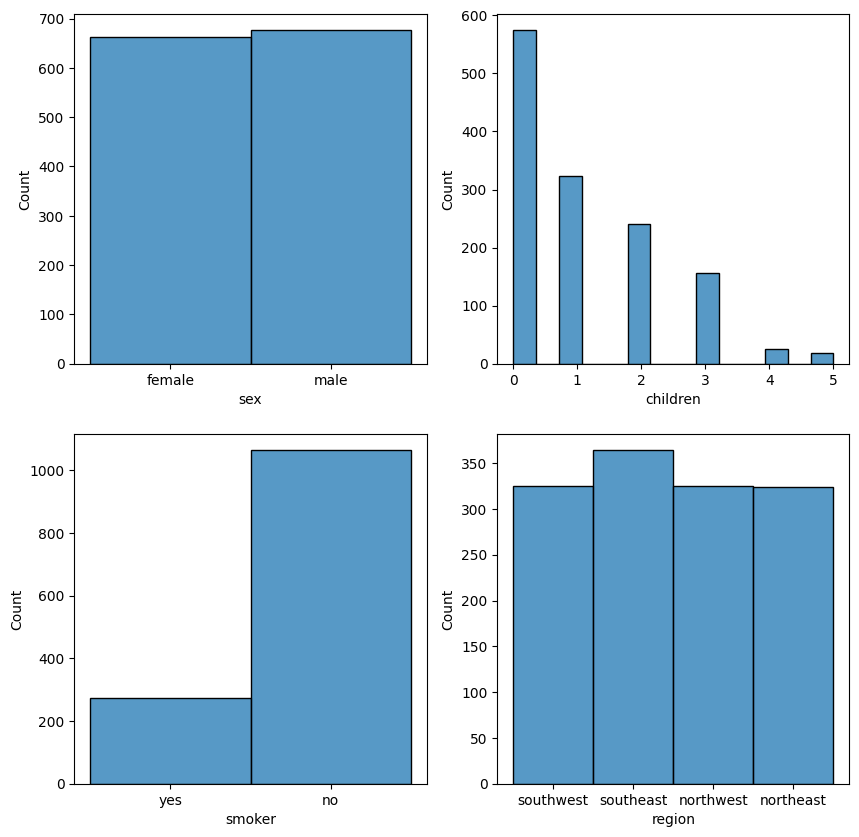

In [6]:
fig, axis = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(ax = axis[0,0], data = pacientes, x = "sex")
sns.histplot(ax = axis[0,1], data = pacientes, x = "children")
sns.histplot(ax = axis[1,0], data = pacientes, x = "smoker")
sns.histplot(ax = axis[1,1], data = pacientes, x = "region")


Observando las gráficas vemos lo siguiente:

- Hay prácticamente el mismo número de hombres y mujeres, siendo los primeros un poco mayoritarios.

- La mayoría de los pacientes no incluyen a ningún niño dentro del seguro médico. Los pacientes que meten mas niños en su seguro son menos numerosos.

- Un amplio porcentaje son no fumadores.

- Prácticamente los pacientes están repartidos de igual manera por las distintas regiones del país. Siendo la región southeast la que mas pacientes alberga.

Grafiquemos ahora las variables numéricas

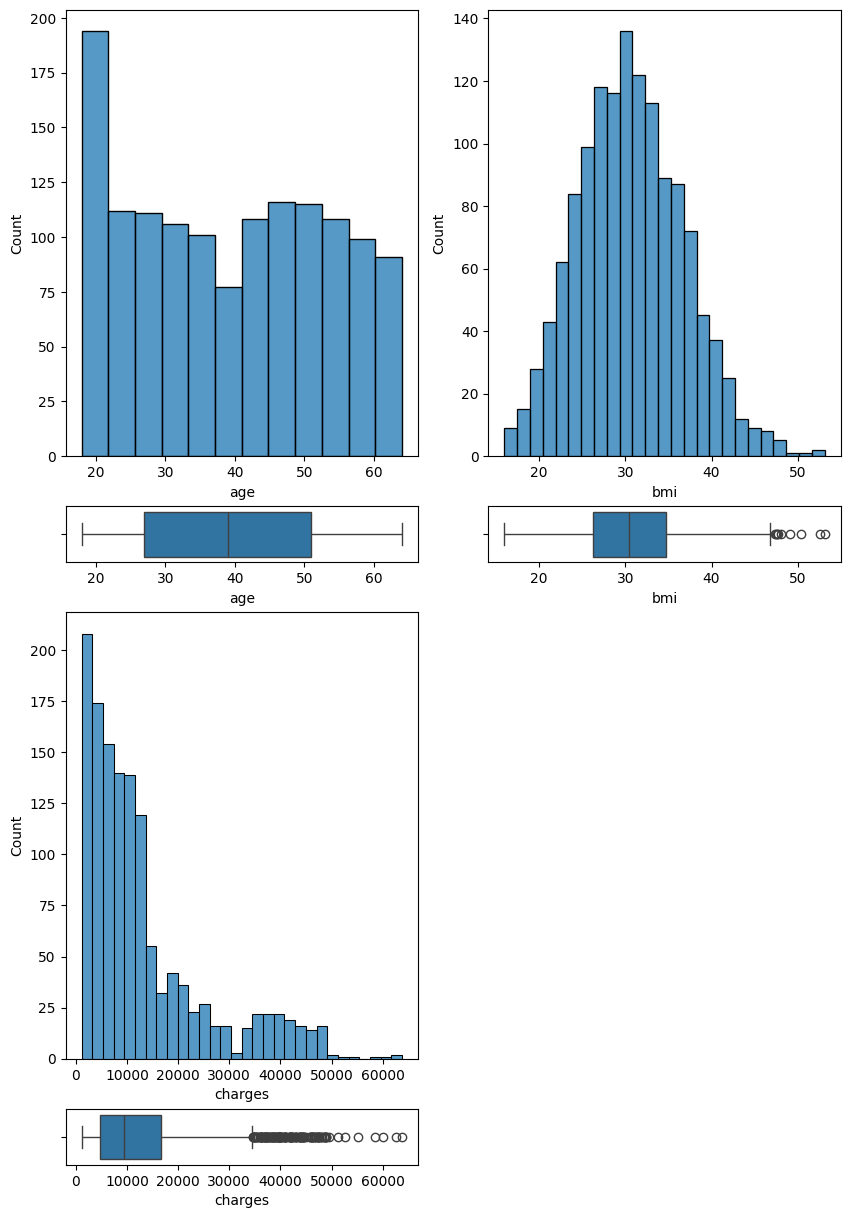

In [7]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15), gridspec_kw = {"height_ratios": [8, 1, 8, 1]})

sns.histplot(ax = axis[0, 0], data = pacientes, x = "age")
sns.boxplot(ax = axis[1, 0], data = pacientes, x = "age")

sns.histplot(ax = axis[0, 1], data = pacientes, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = pacientes, x = "bmi")

sns.histplot(ax = axis[2, 0], data = pacientes, x = "charges")
sns.boxplot(ax = axis[3, 0], data = pacientes, x = "charges")

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])



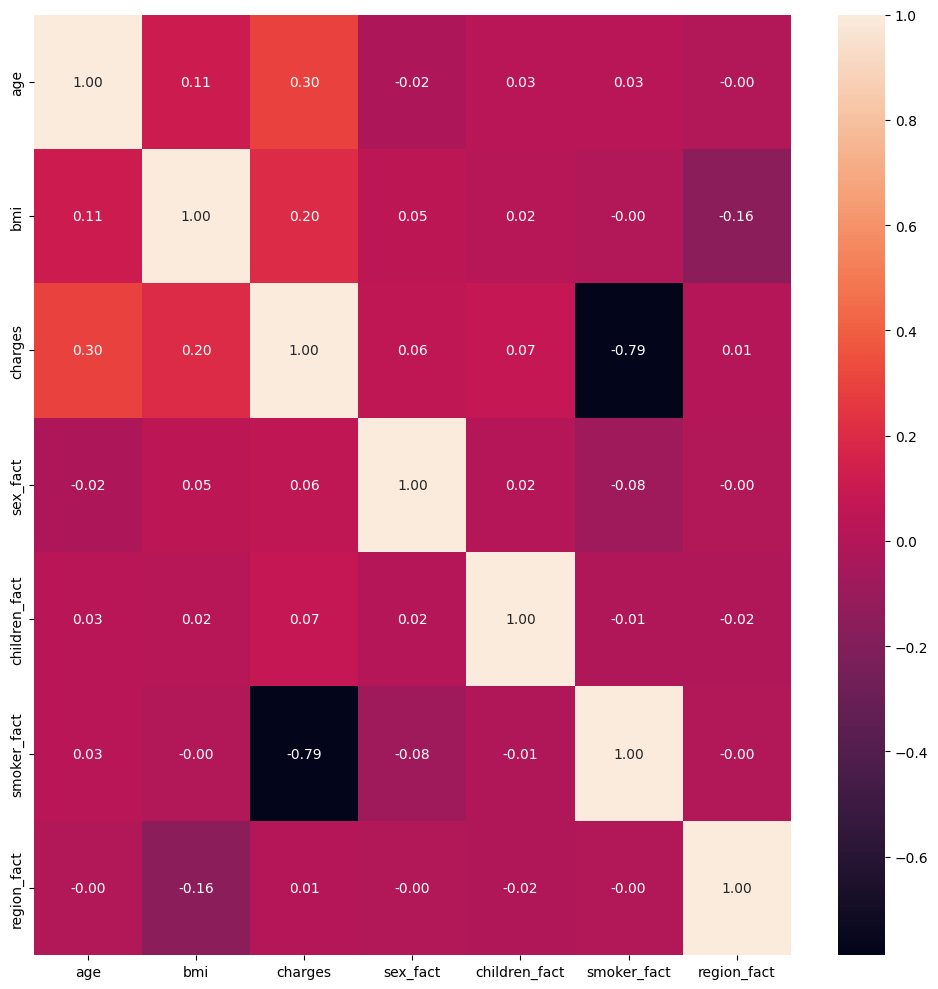

In [8]:
#Creamos un nuevo dataset con la misma información, para no modificar el original
pacientes_final = pacientes

pacientes_final['sex_fact'] = pd.factorize(pacientes_final['sex'])[0]
pacientes_final['children_fact'] = pd.factorize(pacientes_final['children'])[0]
pacientes_final['smoker_fact'] = pd.factorize(pacientes_final['smoker'])[0]
pacientes_final['region_fact'] = pd.factorize(pacientes_final['region'])[0]

fig, axes = plt.subplots(figsize = (10,10))

sns.heatmap(pacientes_final[['age', 'bmi', 'charges', 'sex_fact', 'children_fact', 'smoker_fact', 'region_fact']].corr(), annot = True, fmt = '.2f')


plt.tight_layout()

plt.show()



Mirando el mapa de calor, vemos que la variable charges tiene una correlación inversamente proporcional (-0.79) respecto a la variable smoker

In [ ]:
pacientes_final.head(10)

,age,sex,bmi,children,smoker,region,charges,sex_fact,children_fact,smoker_fact,region_fact
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,2,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,2
5,31,female,25.740,0,no,southeast,3756.62160,0,0,1,1
6,46,female,33.440,1,no,southeast,8240.58960,0,1,1,1
7,37,female,27.740,3,no,northwest,7281.50560,0,2,1,2
8,37,male,29.830,2,no,northeast,6406.41070,1,3,1,3
9,60,female,25.840,0,no,northwest,28923.13692,0,0,1,2


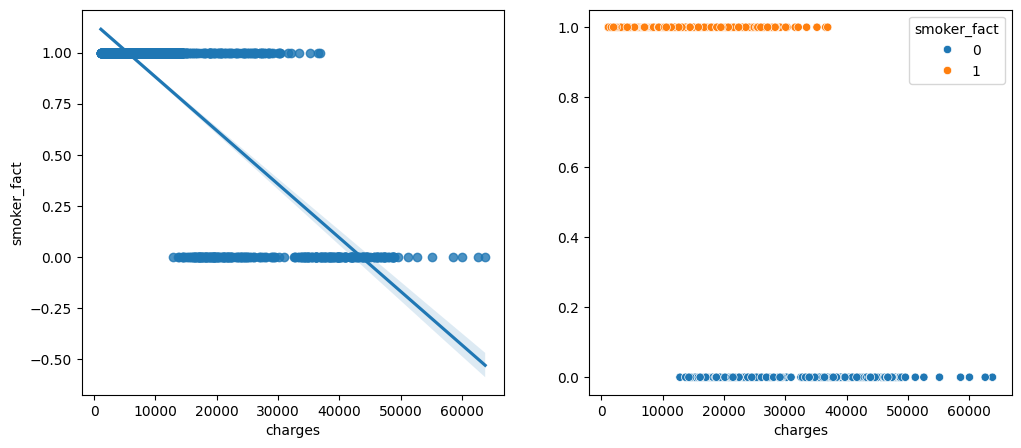

In [10]:
fig, axis = plt.subplots(figsize = (12, 5), ncols = 2)

sns.regplot(ax = axis[0], data = pacientes_final, x = "charges", y = "smoker_fact")
sns.scatterplot(ax = axis[1], data = pacientes_final, x = 'charges', y = 'smoker_fact', hue = 'smoker_fact').set(ylabel = None)

plt.show()

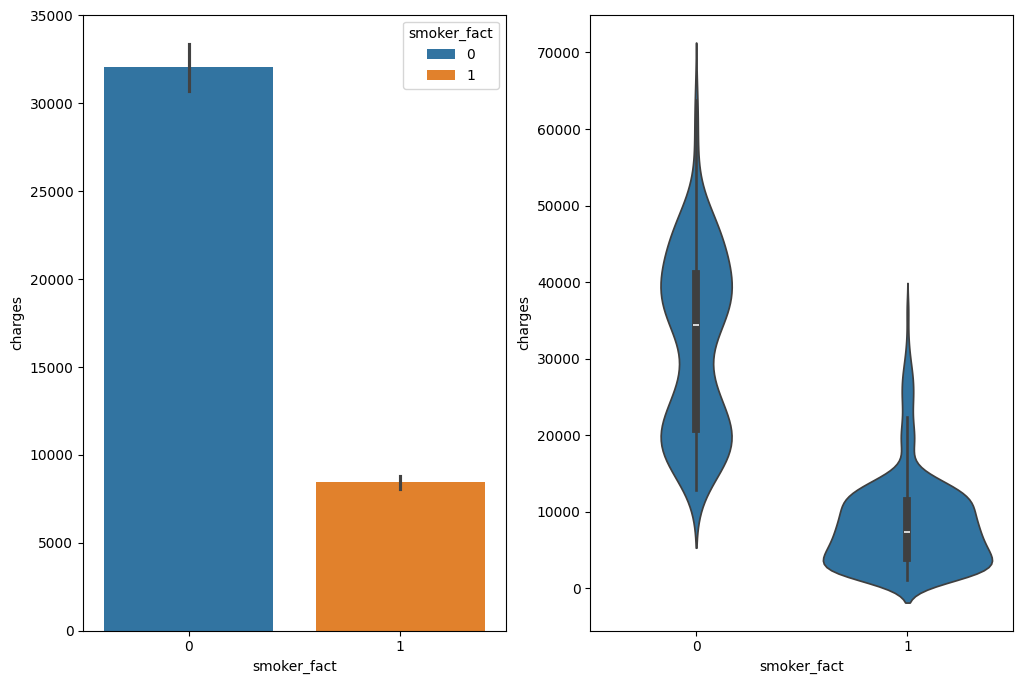

In [11]:
fig, axis = plt.subplots(figsize = (12, 8), ncols = 2)

sns.barplot(ax = axis[0], data = pacientes_final, x = 'smoker_fact', y = 'charges', hue = 'smoker_fact')
sns.violinplot(ax = axis[1], data = pacientes_final, x= 'smoker_fact', y = 'charges')

plt.show()

De las gráficas anteriores podemos concluir que el precio del seguro sube si la persona es fumadora.

In [ ]:
pacientes_final.head()

,age,sex,bmi,children,smoker,region,charges,sex_fact,children_fact,smoker_fact,region_fact
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,2,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,2


In [ ]:
pacientes_fact = pacientes_final.drop(['sex', 'children', 'smoker', 'region'], axis = 1)

pacientes_fact.head()

,age,bmi,charges,sex_fact,children_fact,smoker_fact,region_fact
0,19,27.900,16884.92400,0,0,0,0
1,18,33.770,1725.55230,1,1,1,1
2,28,33.000,4449.46200,1,2,1,1
3,33,22.705,21984.47061,1,0,1,2
4,32,28.880,3866.85520,1,0,1,2


In [ ]:
pacientes_fact.describe()

,age,bmi,charges,sex_fact,children_fact,smoker_fact,region_fact
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,0.505232,1.162182,0.795217,1.484305
std,14.049960,6.098187,12110.011237,0.500160,1.287941,0.403694,1.104885
min,18.000000,15.960000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,4740.287150,0.000000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,9382.033000,1.000000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,16639.912515,1.000000,2.000000,1.000000,2.000000
max,64.000000,53.130000,63770.428010,1.000000,5.000000,1.000000,3.000000


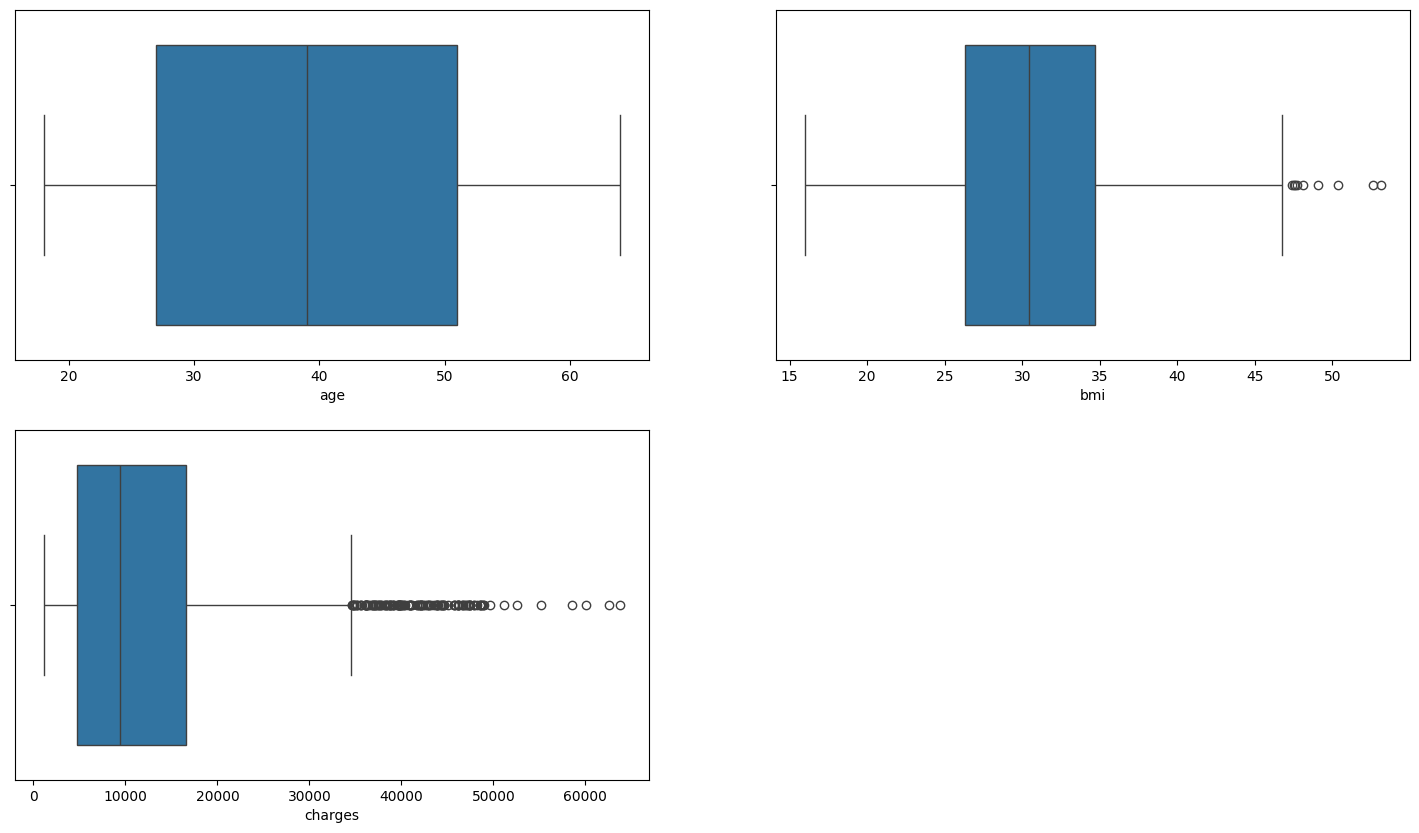

In [15]:
fig, axes = plt.subplots(2, 2, figsize = (18, 10))

sns.boxplot(ax = axes[0, 0], data = pacientes_fact, x = 'age')
sns.boxplot(ax = axes[0, 1], data = pacientes_fact, x = 'bmi')
sns.boxplot(ax = axes[1, 0], data = pacientes_fact, x = 'charges')

fig.delaxes(axes[1, 1])


Aunque tanto en las variables 'charges' y 'bmi', existen datos outliers, no podemos eliminarlos porque pueden ser válidos.

In [16]:
pacientes_fact.isnull().sum().sort_values(ascending=False)


age              0
bmi              0
charges          0
sex_fact         0
children_fact    0
smoker_fact      0
region_fact      0
dtype: int64

Tras hacer un análisis del dataset, hemos concluido que que los datos recogidos en cada variable son correctos y totalmente validos para agregarlos a nuestro modelo de Machine Learning.

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression


scaler = MinMaxScaler()

variables = ['age', 'bmi', 'sex_fact', 'children_fact', 'smoker_fact', 'region_fact', 'charges']

scaled_variables = scaler.fit_transform(pacientes_fact[variables])

pacientes_scaled = pd.DataFrame(scaled_variables, index = pacientes_fact.index, columns = variables)

pacientes_scaled.head()

,age,bmi,sex_fact,children_fact,smoker_fact,region_fact,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,1.0,0.2,1.0,0.333333,0.009636
2,0.217391,0.458434,1.0,0.4,1.0,0.333333,0.053115
3,0.326087,0.181464,1.0,0.0,1.0,0.666667,0.333010
4,0.304348,0.347592,1.0,0.0,1.0,0.666667,0.043816


In [ ]:
X = pacientes_scaled.drop('charges', axis = 1)
y = pacientes_scaled['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

modelo = SelectKBest(score_func = f_regression, k = 4)

modelo.fit(X_train, y_train)

ix = modelo.get_support()

X_train_sel = pd.DataFrame(modelo.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(modelo.transform(X_test), columns = X_test.columns.values[ix])


X_train_sel.head()

,age,bmi,children_fact,smoker_fact
0,0.608696,0.107345,0.6,1.0
1,0.630435,0.224913,0.0,1.0
2,0.739130,0.239440,0.0,1.0
3,0.456522,0.493947,0.8,1.0
4,0.782609,0.148238,0.4,1.0


Tras aplicar el modelo SelectKBest, obtenemos que las 4 mejores variables para calcular el precio del seguro médico son la edad, el indice de grasa corporal, el número de niños que haya dentro del seguro y si el asegurado fumao no.

In [19]:
#Agregamos las etiquetas de entrenamiento (y_train) y prueba (y_test) como una nueva columna en los dataframes X_train_sel y X_test_sel, respectivamente
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)

#Guardamos los dataframes en formato .csv para usarlos posteriormente en el modelo de machine learning
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [ ]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()


,age,bmi,children_fact,smoker_fact,charges
0,0.608696,0.107345,0.6,1.0,0.128845
1,0.630435,0.224913,0.0,1.0,0.118324
2,0.739130,0.239440,0.0,1.0,0.414952
3,0.456522,0.493947,0.8,1.0,0.119316
4,0.782609,0.148238,0.4,1.0,0.181225


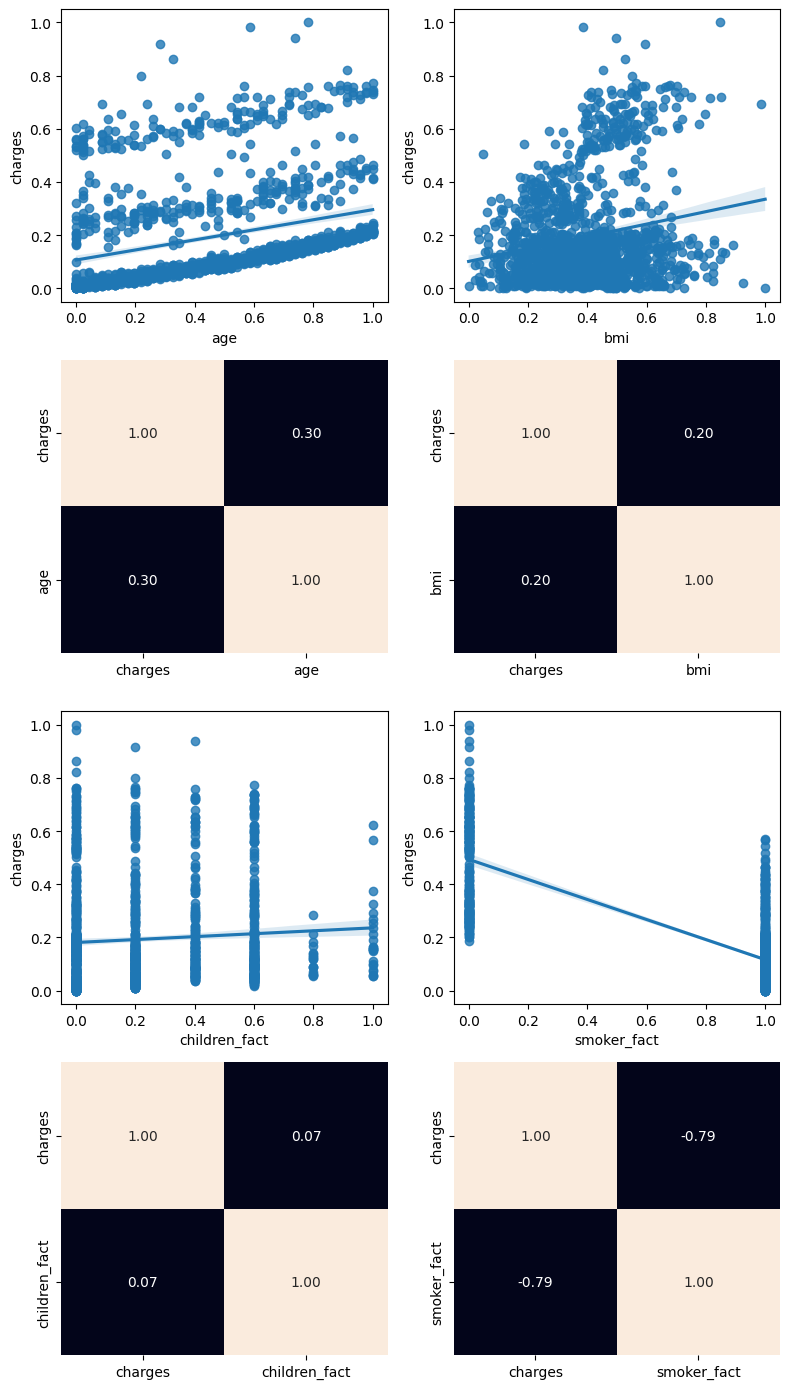

In [21]:
fig, axis = plt.subplots(4, 2, figsize = (8, 14))
pacientes_data = pd.concat([train_data, test_data])

sns.regplot(data = pacientes_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(pacientes_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = pacientes_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(pacientes_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = pacientes_data, x = "children_fact", y = "charges", ax = axis[2, 0])
sns.heatmap(pacientes_data[["charges", "children_fact"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = pacientes_data, x = "smoker_fact", y = "charges", ax = axis[2, 1])
sns.heatmap(pacientes_data[["charges", "smoker_fact"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [22]:

X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [23]:
print(f"Intercepto (b0): {modelo.intercept_}")
print(f"Coeficientes (b1, b2, b3, b4): {modelo.coef_}")

y_pred = modelo.predict(X_test)


Intercepto (b0): 0.3216383785895941
Coeficientes (b1, b2, b3, b4): [ 0.18897632  0.19392564  0.04040211 -0.37753669]


La ecuación para calcular nuestro y (charges) se vería de esta manera:


Charges = bo + b1 * age + b2 * bmi + b3 * children_fact + b4 * smoker_fact + e

e = valores de la prueba - valores predichos

In [24]:
e = y_test - y_pred
e

0     -0.000072
1     -0.025156
2     -0.117338
3      0.004227
4      0.111803
         ...   
263    0.126883
264    0.010281
265   -0.018356
266    0.366384
267   -0.043234
Name: charges, Length: 268, dtype: float64

In [25]:

print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

RMSE: 0.09303887904435329
R2: 0.7811618762595849


Un RMSE de 0.093 es un valor relativamente bajo, lo que sugiere que el modelo está haciendo buenas predicciones.

Un R2 de 0.7811 es bastante bueno, lo que indica que el modelo está realizando una predicción precisa en el 78.11% de los casos.

In [26]:
from pickle import dump

dump(modelo, open("../models/modelo_Rlineal.sav", "wb"))